# Feature Engineering and Assumptions:

We might need to make some assumptions to estimate habitability-related parameters. For example, we can assume that exoplanets orbiting stars with lower apparent magnitudes (which are generally brighter and thus potentially hotter) might have a different likelihood of habitability.

We can use the orbital_radius (distance from the star) as a proxy for the 'habitable zone'. Planets too close to their stars may be too hot, while those too far away may be too cold.

**Habitability Criteria Definition:**
Define what ‘habitable’ means in the context of our dataset. For simplicity, we could define a 'potentially habitable' planet as one that meets certain criteria related to its size (e.g., similar to Earth) and its distance from its star (e.g., in the 'habitable zone').

**Feature Selection:**
Choose which features from the dataset are likely to be relevant for predicting habitability. These might include mass_multiplier, radius_multiplier, orbital_radius, orbital_period, eccentricity, etc.

**Labeling the Data:**
Based on the criteria defined in step 2, label the exoplanets in our dataset as 'potentially habitable' or 'not potentially habitable'. This will be our target variable for the model.

**Model Building:**
Use the selected features to build a classification model (e.g., Logistic Regression, Random Forest, Support Vector Machine) that predicts whether a given exoplanet is potentially habitable or not.

**Model Evaluation:**
Split the data into training and testing sets, train the model on the training set, and evaluate it on the testing set using appropriate metrics (e.g., accuracy, precision, recall, F1 score).

**Interpretation and Conclusion:**
Interpret the results, identify the most important features for predicting habitability, and draw conclusions.

**Potential for Further Exploration:**
Discuss the limitations of the model (e.g., assumptions made due to lack of data) and suggest ways the model might be improved with additional data (e.g., star temperature and luminosity).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'data/cleaned_5250.csv'
planets_data = pd.read_csv(file_path)

In [2]:
planets_data.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [3]:
planets_data.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


In [4]:
planets_data.columns

Index(['name', 'distance', 'stellar_magnitude', 'planet_type',
       'discovery_year', 'mass_multiplier', 'mass_wrt', 'radius_multiplier',
       'radius_wrt', 'orbital_radius', 'orbital_period', 'eccentricity',
       'detection_method'],
      dtype='object')

### Column Descriptions

**Name:**
Description: The name of the exoplanet.

**distance:**
Description: The distance of the exoplanet from Earth, typically measured in light-years.

**stellar_magnitude:**
Description: The apparent magnitude of the star that the exoplanet orbits. Apparent magnitude measures the brightness of the star as seen from Earth. A lower magnitude indicates a brighter star, while a higher magnitude indicates a fainter star.

**planet_type:**
Description: The type or classification of the exoplanet (e.g., Gas Giant, Terrestrial, etc.).

**discovery_year:**
Description: The year when the exoplanet was officially discovered.

**mass_multiplier:**
Description: A multiplier used to convert the mass of the exoplanet to a standard known unit. For example, a multiplier of 2 with a reference to Jupiter's mass would indicate the exoplanet is twice as massive as Jupiter.

**mass_wrt (With Respect To):**
Description: The reference mass to which the multiplier should be applied. Common references might be Earth or Jupiter.

**radius_multiplier:**
Description: Similar to the mass multiplier, this is used to convert the radius of the exoplanet to a standard known unit.

**radius_wrt (With Respect To):**
Description: The reference radius to which the multiplier should be applied. Common references might be Earth or Jupiter.

**orbital_radius:**
Description: The semi-major axis of the exoplanet's orbit, often measured in Astronomical Units (AU). An AU is the average distance between the Earth and the Sun.

**orbital_period:**
Description: The period of the exoplanet’s orbit around its star, typically measured in Earth years. It represents how long it takes the exoplanet to complete one full orbit around its star.

**eccentricity:**
Description: A measure of the shape of the exoplanet’s orbit. An eccentricity of 0 indicates a perfect circle, while values closer to 1 indicate more elongated orbits.

**detection_method:**
Description: The method or technique used to detect the exoplanet. Common methods include Radial Velocity (which involves detecting the star's "wobble" due to the gravitational pull of an orbiting planet) and Transit (which involves detecting the dimming of a star's light as a planet passes in front of it).


### Relevant Columns towards Habitability
Relevant columns that are worth investigating towards completing a machine learning model that will predict the liklihood of habitabilty of an exoplanet

**Stellar_magnitude:**
Importance: The brightness of the star can give clues about its type and temperature. The type of star and its temperature can influence the habitability conditions on the planet.

**planet_type:**
Importance: Some planet types, like rocky planets, might be more likely to support life as we know it compared to gas giants.

**mass_multiplier and mass_wrt:**
Importance: The mass of the planet can influence its gravitational pull, atmosphere retention, and geological activity. Planets too light might not retain an atmosphere, while those too heavy might have extreme gravitational forces.

**radius_multiplier and radius_wrt:**
Importance: The planet's size can give us insights into its composition and whether it's more Earth-like or more akin to gas giants like Jupiter.

**orbital_radius:**
Importance: This determines the planet's position in relation to its star, which in turn can hint at its surface temperature. The concept of the "Goldilocks Zone" or "Habitable Zone" is crucial here: planets too close to their star might be too hot, while those too far away might be too cold. The ideal position is where liquid water could potentially exist on the planet's surface.

**orbital_period:**
Importance: A very short orbital period might indicate proximity to the star and potentially extreme temperatures. Conversely, a long orbital period might indicate the planet is far from its star, potentially leading to colder conditions.

**eccentricity:**
Importance: A highly eccentric orbit can result in extreme temperature variations on the planet, which might affect its habitability.

**detection_method:**
Importance: While this might not directly indicate habitability, certain detection methods might be biased towards discovering specific types of planets. For example, the Transit method is often better at finding larger planets close to their stars.

In [5]:
# 1. Check for missing values
missing_values_count = planets_data.isnull().sum()
print(missing_values_count)

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64


**[notes] Missing Values**
distance: 17 missing values
stellar_magnitude: 161 missing values
mass_multiplier: 23 missing values
mass_wrt: 23 missing values
radius_multiplier: 17 missing values
radius_wrt: 17 missing values
orbital_radius: 289 missing values

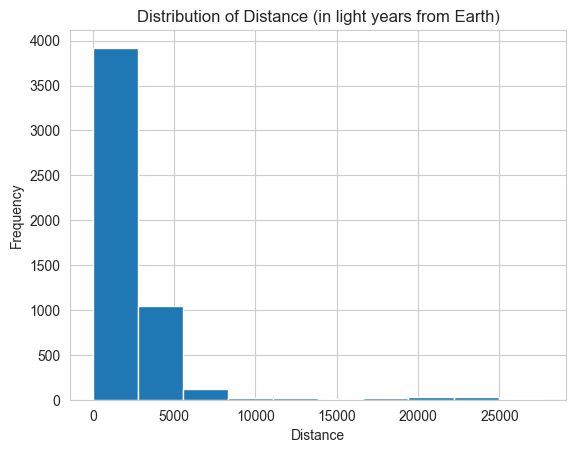

In [6]:
import matplotlib.pyplot as plt
planets_data['distance'].hist()
plt.title('Distribution of Distance (in light years from Earth)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

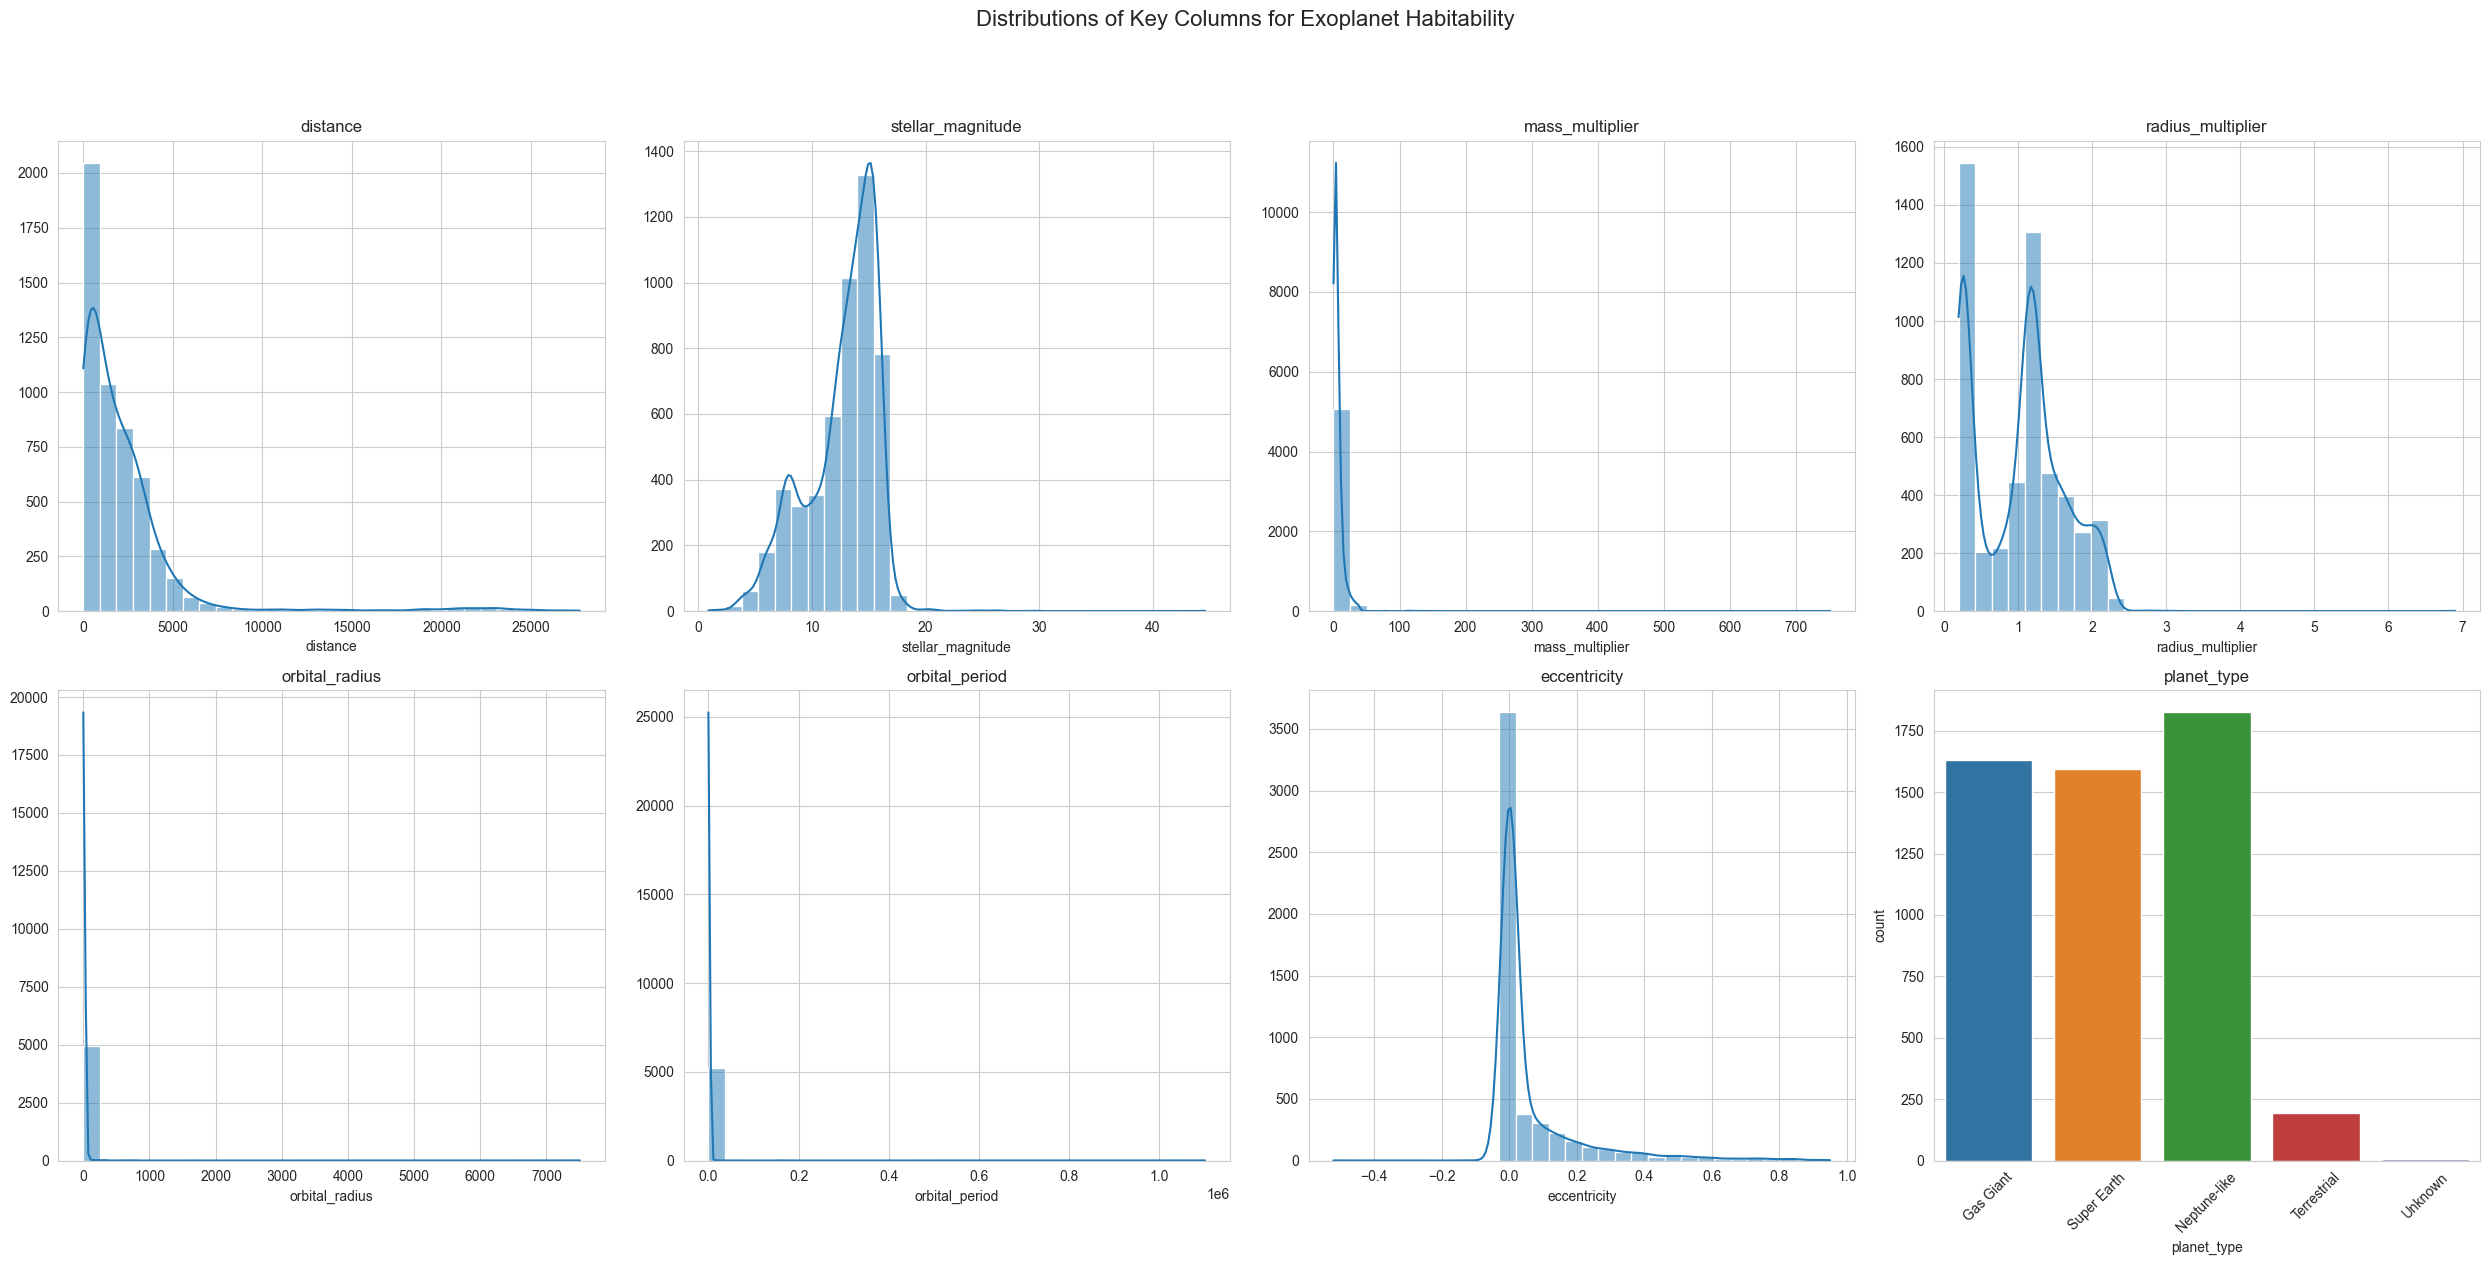

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for a 2x4 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 12))
fig.suptitle('Distributions of Key Columns for Exoplanet Habitability', fontsize=16, y=1.05)

# List of numerical columns for visualization
numerical_columns = ['distance', 'stellar_magnitude', 'mass_multiplier', 'radius_multiplier', 'orbital_radius', 'orbital_period', 'eccentricity']

# Plot histograms for numerical columns
for ax, col in zip(axes.flatten(), numerical_columns):
    sns.histplot(planets_data[col], kde=True, ax=ax, bins=30)
    ax.set_title(col)
    ax.set_ylabel('')

# Plot a bar plot for the categorical column 'planet_type'
sns.countplot(data=planets_data, x='planet_type', ax=axes[1, 3])
axes[1, 3].set_title('planet_type')
axes[1, 3].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


**[Notes]**
**distance:** This histogram shows the distribution of distances of exoplanets from Earth. Most exoplanets in this dataset are located within 100 light-years of Earth, with a few exceptions further away.

**stellar_magnitude:** The distribution indicates that most of the host stars have an apparent magnitude between 8 and 16. Remember, higher magnitude values mean fainter stars, and lower values mean brighter stars.

**mass_multiplier:** This shows the distribution of mass multipliers for the exoplanets. Most of the planets seem to have a mass multiplier between 0 and 10, indicating they are within 10 times the reference mass.

**radius_multiplier:** Similarly, most planets have a radius multiplier between 0 and 3, suggesting they are within 3 times the reference radius.

**orbital_radius:** The distribution of the semi-major axis of the exoplanets' orbits reveals that most planets are located very close to their stars, within 1 Astronomical Unit (AU), with some exceptions further out.

**orbital_period:** Most exoplanets have an orbital period less than 10 Earth years, indicating they complete one full orbit around their star in that time.

**eccentricity:** The majority of exoplanets have low eccentricity, suggesting circular or near-circular orbits. High eccentricity values indicate more elongated orbits.

**planet_type:** The bar plot shows the count of each type of exoplanet. Gas giants are the most common type in this dataset, followed by super-Earths and others.

### Correlation Analysis

We'll drop the name column since it's just an identifier and doesn't provide meaningful information for correlation analysis.
We'll one-hot encode the categorical columns: planet_type, mass_wrt, radius_wrt, and detection_method.
Finally, we'll compute the correlation matrix for the resulting dataset.

In [8]:
# Drop the 'name' column
encoded_data = planets_data.drop(columns=['name'])

# One-hot encode the categorical columns
columns_to_encode = ['planet_type', 'mass_wrt', 'radius_wrt', 'detection_method']
encoded_data = pd.get_dummies(encoded_data, columns=columns_to_encode)

# Compute the correlation matrix for the dataset with one-hot encoded columns
correlation_matrix_encoded = encoded_data.corr()

correlation_matrix_encoded.head()  # Displaying the top rows of the correlation matrix for a quick look

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,planet_type_Gas Giant,planet_type_Neptune-like,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
distance,1.000000,0.614542,0.094017,0.017010,-0.035992,-0.026579,-0.017096,-0.213818,0.003443,0.055493,...,-0.062630,-0.006676,-0.014229,0.786857,0.019506,-0.001429,0.012285,-0.288172,-0.023674,-0.009891
stellar_magnitude,0.614542,1.000000,0.218010,-0.024383,-0.049920,-0.015749,-0.000663,-0.469103,-0.486420,0.199007,...,-0.089349,-0.019147,0.039217,0.179307,0.024937,0.036922,0.008192,-0.743309,0.704176,0.015647
discovery_year,0.094017,0.218010,1.000000,0.037767,-0.070002,0.004178,0.012580,-0.152491,-0.269113,0.150239,...,-0.054201,0.010473,-0.017474,0.078168,-0.001700,-0.101958,-0.019183,-0.272589,0.243803,0.004214
mass_multiplier,0.017010,-0.024383,0.037767,1.000000,-0.069347,0.022574,0.008640,0.012292,-0.082389,0.233671,...,0.153705,-0.004196,0.001503,-0.004360,-0.013461,-0.012244,0.001607,0.000760,-0.036655,0.007210
radius_multiplier,-0.035992,-0.049920,-0.070002,-0.069347,1.000000,0.014667,0.005994,0.025138,0.161434,-0.632294,...,0.071173,0.003778,0.011984,0.003718,0.005103,0.014947,0.003885,0.011396,-0.029437,-0.023505


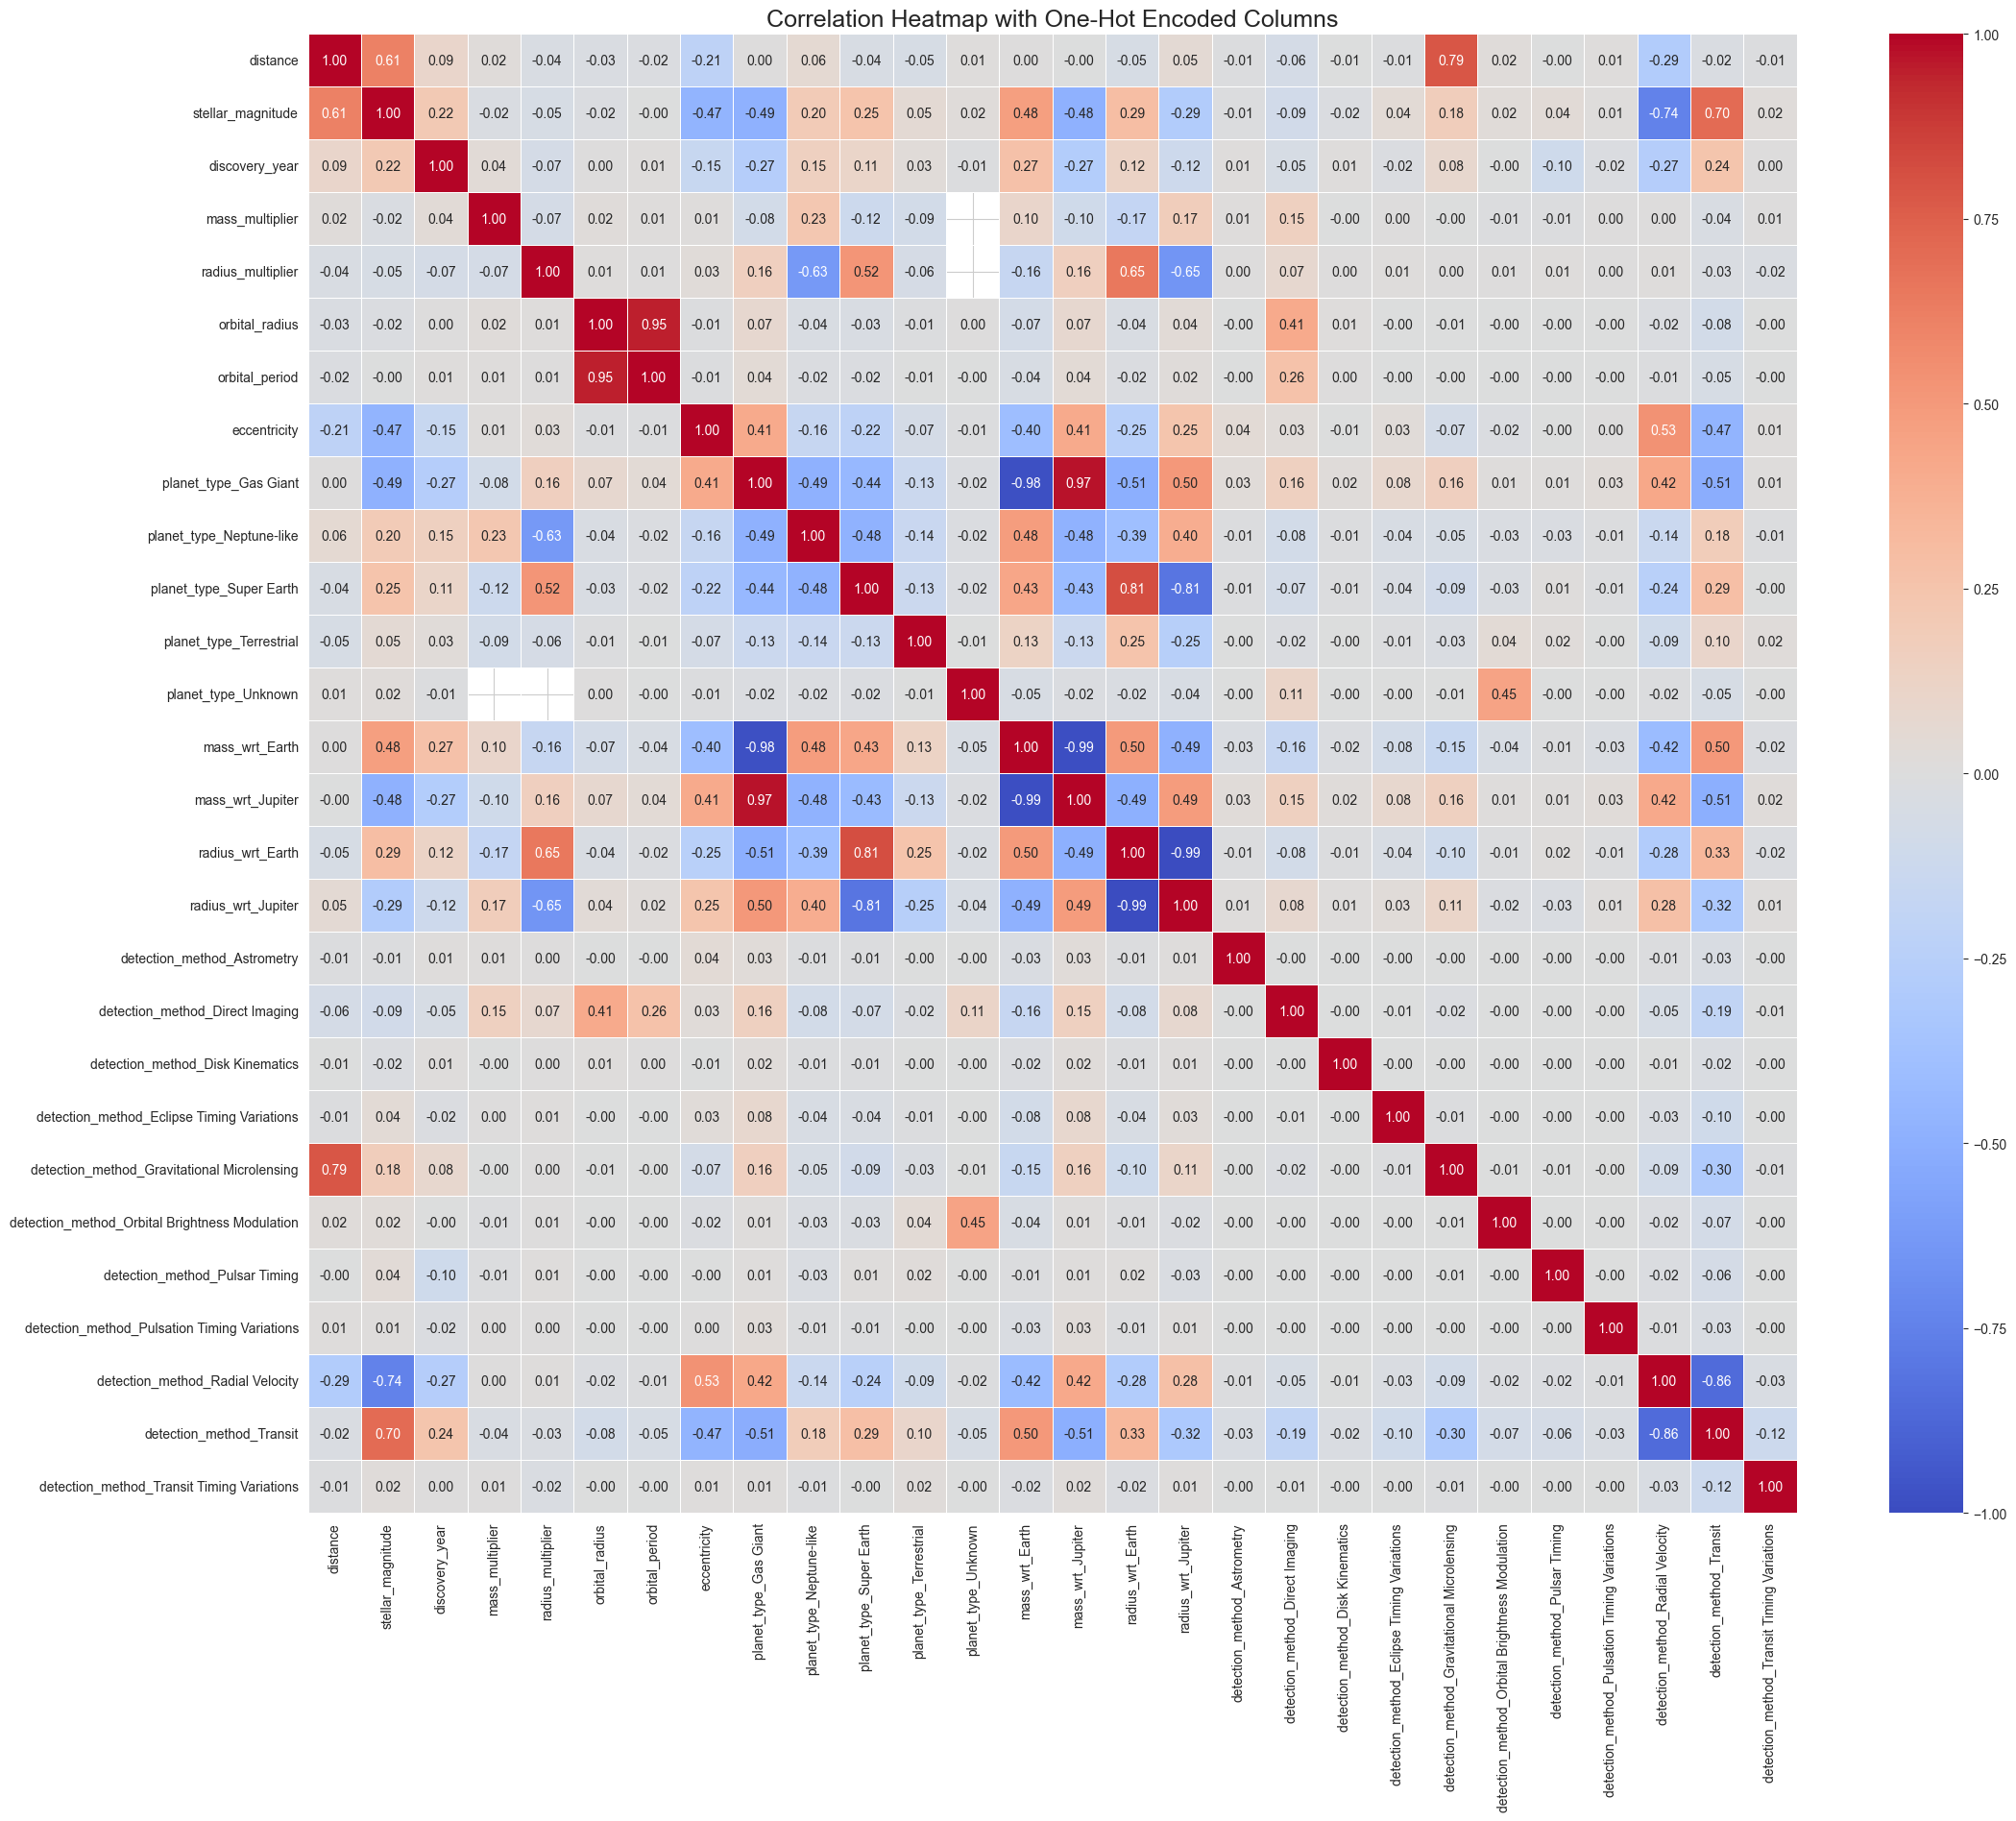

In [9]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap with One-Hot Encoded Columns", fontsize=18)
plt.show()

### Creating a habitability score for the planets

In [10]:
# Correct the function to calculate habitability score based on the available columns
def calculate_habitability_score_corrected(row):
    score = 0

    # Goldilocks Zone: Give higher score for planets with orbital radius close to 1 (like Earth's)
    score += np.exp(-((row['orbital_radius'] - 1) ** 2) / (2 * 0.5 ** 2))

    # Planet Type: Assign points for Terrestrial or Super Earth types
    if row['planet_type_Terrestrial'] == 1 or row['planet_type_Super Earth'] == 1:
        score += 1

    # Size and Mass: Give higher score for planets close to Earth's size and mass (multiplier close to 1)
    score += np.exp(-((row['radius_multiplier'] - 1) ** 2) / (2 * 0.5 ** 2))
    score += np.exp(-((row['mass_multiplier'] - 1) ** 2) / (2 * 0.5 ** 2))

    # Stable Orbit: Assign points for low eccentricity (closer to circular orbit)
    score += (1 - row['eccentricity'])

    return score

# Recalculate the habitability score for each planet using the corrected function
encoded_data['habitability_score'] = encoded_data.apply(calculate_habitability_score_corrected, axis=1)

# Display the top rows with the new habitability score column
encoded_data[['habitability_score']].head()


,habitability_score
0,2.602466
1,2.474112
2,2.899836
3,1.603470
4,1.957742


### Feature Creation

In [11]:
# Create the interaction feature
encoded_data['mass_radius_interaction'] = encoded_data['mass_multiplier'] * encoded_data['radius_multiplier']

# Display the top rows with the new interaction feature column
encoded_data[['mass_multiplier', 'radius_multiplier', 'mass_radius_interaction']].head()


,mass_multiplier,radius_multiplier,mass_radius_interaction
0,19.40000,1.08,20.952000
1,14.74000,1.09,16.066600
2,4.80000,1.15,5.520000
3,8.13881,1.12,9.115467
4,1.78000,1.20,2.136000


In [12]:
# Calculate the orbital speed for each planet
encoded_data['orbital_speed'] = (2 * np.pi * encoded_data['orbital_radius']) / encoded_data['orbital_period']

# Display the top rows with the new orbital speed feature column
encoded_data[['orbital_radius', 'orbital_period', 'orbital_speed']].head()

,orbital_radius,orbital_period,orbital_speed
0,1.290000,0.892539,9.081178
1,1.530000,1.400000,6.866624
2,0.830000,0.508693,10.251855
3,2.773069,4.800000,3.629939
4,1.660000,2.200000,4.740949


0.031774559865574904

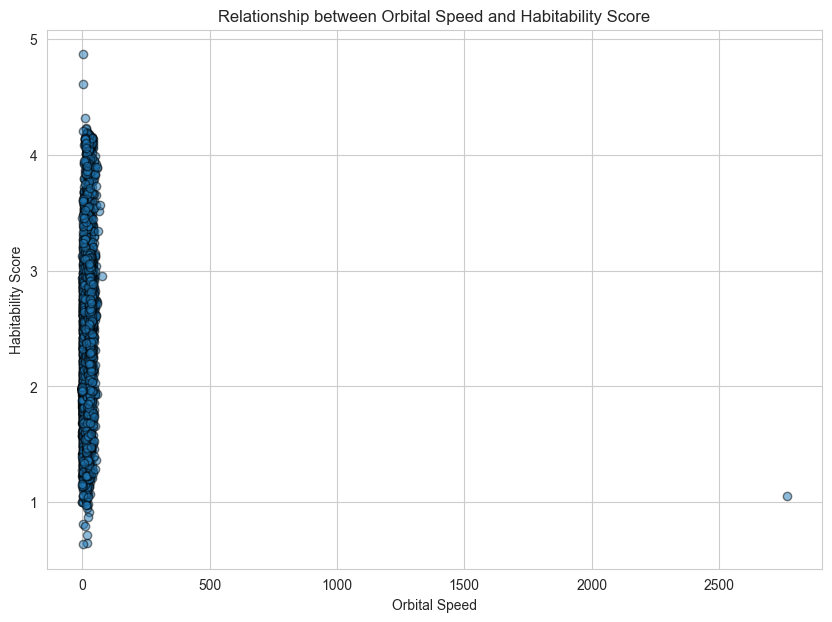

In [13]:
# Calculate the Pearson correlation coefficient between 'orbital_speed' and 'habitability_score'
correlation_coefficient = encoded_data['orbital_speed'].corr(encoded_data['habitability_score'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 7))
plt.scatter(encoded_data['orbital_speed'], encoded_data['habitability_score'], alpha=0.5, edgecolor='k')
plt.title('Relationship between Orbital Speed and Habitability Score')
plt.xlabel('Orbital Speed')
plt.ylabel('Habitability Score')
plt.grid(True)

correlation_coefficient

The Pearson correlation coefficient between orbital_speed and habitability_score is approximately
0.0318
0.0318. This value is close to 0, indicating a weak linear relationship between the two features.

### Feature Transformation
Transforming features can help in improving the model's performance by capturing non-linear relationships or by normalizing the distribution of skewed features.

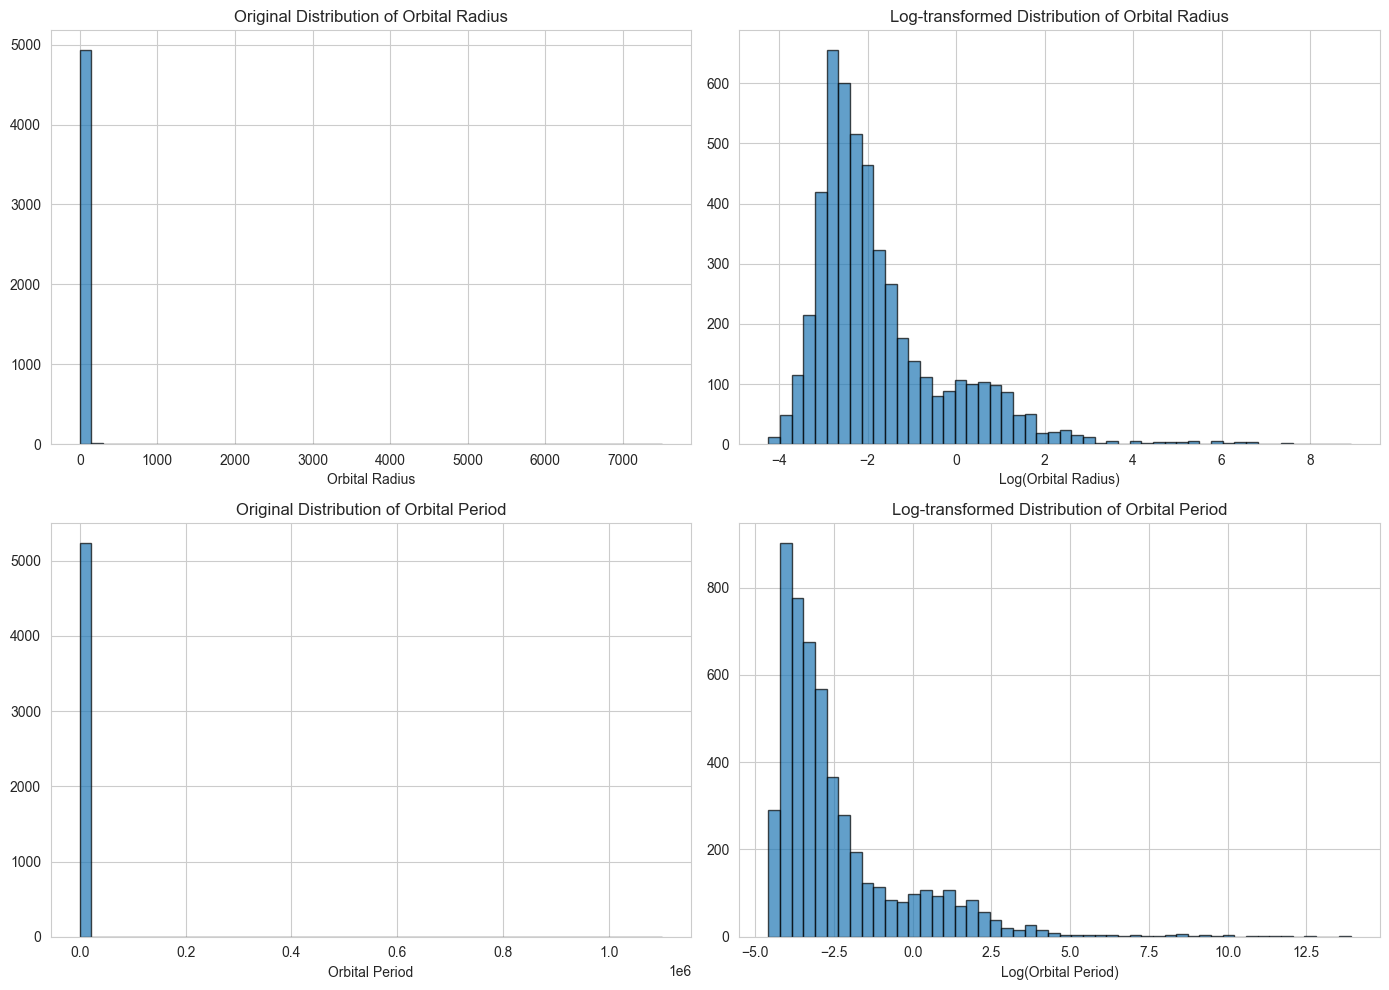

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-applying log transformation to 'orbital_radius' and 'orbital_period'
encoded_data['log_orbital_radius'] = np.log(encoded_data['orbital_radius'] + 0.01)
encoded_data['log_orbital_period'] = np.log(encoded_data['orbital_period'] + 0.01)

# Visualizing the distributions before and after the log transformation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Original 'orbital_radius' distribution
axes[0, 0].hist(encoded_data['orbital_radius'], bins=50, edgecolor='k', alpha=0.7)
axes[0, 0].set_title('Original Distribution of Orbital Radius')
axes[0, 0].set_xlabel('Orbital Radius')
axes[0, 0].grid(True)

# Log-transformed 'orbital_radius' distribution
axes[0, 1].hist(encoded_data['log_orbital_radius'], bins=50, edgecolor='k', alpha=0.7)
axes[0, 1].set_title('Log-transformed Distribution of Orbital Radius')
axes[0, 1].set_xlabel('Log(Orbital Radius)')
axes[0, 1].grid(True)

# Original 'orbital_period' distribution
axes[1, 0].hist(encoded_data['orbital_period'], bins=50, edgecolor='k', alpha=0.7)
axes[1, 0].set_title('Original Distribution of Orbital Period')
axes[1, 0].set_xlabel('Orbital Period')
axes[1, 0].grid(True)

# Log-transformed 'orbital_period' distribution
axes[1, 1].hist(encoded_data['log_orbital_period'], bins=50, edgecolor='k', alpha=0.7)
axes[1, 1].set_title('Log-transformed Distribution of Orbital Period')
axes[1, 1].set_xlabel('Log(Orbital Period)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Extracting the features for scaling (Continuous Variables) Do not scale Numbers
features_to_scale = encoded_data.drop(columns=['name', 'habitability_score'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features_to_scale)

# Replace original features with scaled features in the dataframe
encoded_data_scaled = encoded_data.copy()
encoded_data_scaled[features_to_scale.columns] = scaled_features

# Display the top rows of the scaled dataset
encoded_data_scaled.head()


KeyError: "['name'] not found in axis"

In [ ]:
# Extracting the features for scaling without dropping 'habitability_score'
features_to_scale = encoded_data.drop(columns=['name'])

# Fit and transform the features
scaled_features = scaler.fit_transform(features_to_scale)

# Replace original features with scaled features in the dataframe
encoded_data_scaled[features_to_scale.columns] = scaled_features

# Display the top rows of the scaled dataset
encoded_data_scaled.head()

# Initialize the scaler again
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features_to_scale)

# Replace original features with scaled features in the dataframe
encoded_data_scaled[features_to_scale.columns] = scaled_features

# Display the top rows of the scaled dataset
encoded_data_scaled.head()

In [ ]:
# One-hot encoding the 'planet_type' column
encoded_data = pd.get_dummies(encoded_data, columns=['planet_type'], drop_first=True)

# Extracting the features for scaling again, excluding 'name'
features_to_scale = encoded_data.drop(columns=['name'])

# Fit and transform the features
scaled_features = scaler.fit_transform(features_to_scale)

# Replace original features with scaled features in the dataframe
encoded_data_scaled[features_to_scale.columns] = scaled_features

# Display the top rows of the scaled dataset
encoded_data_scaled.head()

In [ ]:
# One-hot encoding the 'mass_wrt' and 'radius_wrt' columns
encoded_data = pd.get_dummies(encoded_data, columns=['mass_wrt', 'radius_wrt'], drop_first=True)

# Extracting the features for scaling again, excluding 'name'
features_to_scale = encoded_data.drop(columns=['name'])

# Fit and transform the features
scaled_features = scaler.fit_transform(features_to_scale)

# Replace original features with scaled features in the dataframe
encoded_data_scaled[features_to_scale.columns] = scaled_features

# Display the top rows of the scaled dataset
encoded_data_scaled.head()

In [ ]:
# One-hot encoding the 'detection_method' column
encoded_data = pd.get_dummies(encoded_data, columns=['detection_method'], drop_first=True)

# Extracting the features for scaling again, excluding 'name'
features_to_scale = encoded_data.drop(columns=['name'])

# Fit and transform the features
scaled_features = scaler.fit_transform(features_to_scale)

# Replace original features with scaled features in the dataframe
encoded_data_scaled[features_to_scale.columns] = scaled_features

# Display the top rows of the scaled dataset
encoded_data_scaled.head()

In [ ]:
# Creating a new dataframe for the scaled features
encoded_data_scaled = encoded_data.copy()
encoded_data_scaled[features_to_scale.columns] = scaled_features

# Display the top rows of the scaled dataset
encoded_data_scaled.head()

Each feature, apart from the planet name, is now standardized to have a mean of 0 and a standard deviation of 1.
Categorical columns like planet_type, mass_wrt, radius_wrt, and detection_method have been one-hot encoded, which has resulted in additional columns for each unique category in the dataset.